# Advanced usage

This tutorial was written using a [Jupyter Notebook](https://jupyter.org/).

Start by importing some stuff used by the Jupyter Notebook.

## Examine the available rep to intensity mappings

In [1]:
import matplotlib.pyplot as plt
from streprogen import reps_to_intensity, reps_to_intensity_relaxed, reps_to_intensity_tight

# Set up repetitions and apply all three mappings
reps = list(range(1, 12 + 1))
intensities_norm = list(map(reps_to_intensity, reps))
intensities_relaxed = list(map(reps_to_intensity_relaxed, reps))
intensities_tight = list(map(reps_to_intensity_tight, reps))

### Plotting the rep to intensity mappings

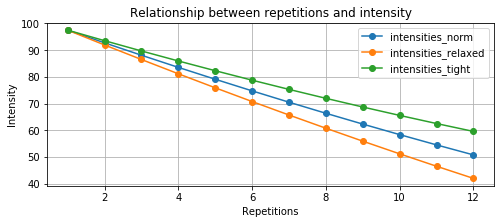

In [2]:
plt.figure(figsize = (8, 3))
plt.title('Relationship between repetitions and intensity')
plt.plot(reps, intensities_norm, '-o', label = 'intensities_norm')
plt.plot(reps, intensities_relaxed, '-o', label = 'intensities_relaxed')
plt.plot(reps, intensities_tight, '-o', label = 'intensities_tight')
plt.ylabel('Intensity')
plt.xlabel('Repetitions')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

### Plotting the rep to intensity mappings

In [3]:
table_width = 6
print('reps'.ljust(8),*[str(i).ljust(table_width) for i in reps])
print('-'*90)
print('norm'.ljust(8), *[str(round(i)).ljust(table_width) for i in intensities_norm])
print('relaxed'.ljust(8),*[str(round(i)).ljust(table_width) for i in intensities_relaxed])
print('tight'.ljust(8),*[str(round(i)).ljust(table_width) for i in intensities_tight])

reps     1      2      3      4      5      6      7      8      9      10     11     12    
------------------------------------------------------------------------------------------
norm     98     93     88     84     79     75     70     66     62     58     54     51    
relaxed  98     92     86     81     76     71     66     61     56     51     46     42    
tight    98     94     90     86     82     79     75     72     69     66     62     60    


### Creating a new rep to intensity mapping

In [4]:
from functools import partial

# Method 1: Using a partial function
custom_set_intensity = partial(reps_to_intensity, slope=-4.4, constant=97.5)
intensities_custom = list(map(custom_set_intensity, reps))

# Method 2: Custom function from scratch
def custom_set_intensity(reps):
    return 97.5 - 8 *(reps - 1) + 0.33*(reps - 1)**2

intensities_custom2 = list(map(custom_set_intensity, reps))

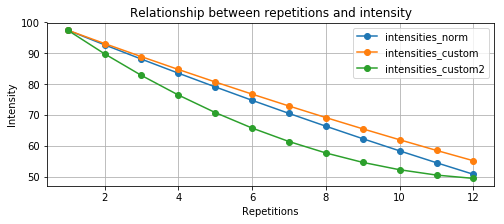

In [5]:
plt.figure(figsize = (8, 3))
plt.title('Relationship between repetitions and intensity')
plt.plot(reps, intensities_norm, '-o', label = 'intensities_norm')
plt.plot(reps, intensities_custom, '-o', label = 'intensities_custom')
plt.plot(reps, intensities_custom2, '-o', label = 'intensities_custom2')
plt.ylabel('Intensity')
plt.xlabel('Repetitions')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

## Examine the available progression models

In [6]:
from streprogen import progression_linear, progression_sinusoidal

# Set up some constants
duration = 8
start, end = 100, 120

# Create lists
weeks = list(range(1, duration + 1))
weight_linear = [progression_linear(week, start, end, 1, duration) for week in weeks]
weight_sine = [progression_sinusoidal(week, start, end, 1, duration) for week in weeks]

### A plot of the available progression models

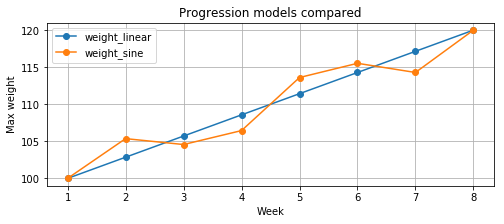

In [7]:
plt.figure(figsize = (8, 3))
plt.title('Progression models compared')
plt.plot(weeks, weight_linear, '-o', label = 'weight_linear')
plt.plot(weeks, weight_sine, '-o', label = 'weight_sine')
plt.ylabel('Max weight')
plt.xlabel('Week')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

## Scale reps and intensities

In [8]:
duration = 12

# A function to create scalers for the repetitions and itensity
reps      = partial(progression_sinusoidal, start_weight = 1.1,  end_weight = 0.9,  start_week = 1, end_week = duration, periods=3, scale=0.25, offset=2)
intensity = partial(progression_sinusoidal, start_weight = 0.95, end_weight = 1.05, start_week = 1, end_week = duration, periods=3, scale=0.04, offset=0)

# Create lists
weeks = list(range(1, duration + 1))
intensities = list(map(intensity, weeks))
reps = list(map(reps, weeks))

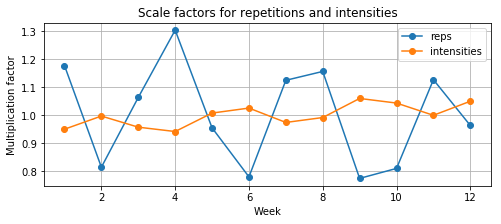

In [9]:
plt.figure(figsize = (8, 3))
plt.title('Scale factors for repetitions and intensities')
plt.plot(weeks, reps, 'o-', label = 'reps')
plt.plot(weeks, intensities, 'o-', label = 'intensities')
plt.ylabel('Multiplication factor')
plt.xlabel('Week')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()